In [5]:
import numpy as np
import pandas as pd
from config import args

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from baseline import *

## Choose metric and data model

In [7]:
loss = '|1-tau_ols|'
model = 'lrmf'

save_plots = True

## Load data

In [8]:
df_mice = load_results('2019-10-24_exp_mi.csv')
df_mice['algo'] = 'mice'
df_mice = df_mice[['model','n','p','prop_miss','seed','method','citcio','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

df_mice_5000 = load_results('2019-10-24_exp_mi.csv')
df_mice_5000['algo'] = 'mice'
df_mice_5000 = df_mice_5000[['model','n','p','prop_miss','seed','method','citcio','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

df_mice = pd.concat((df_mice, df_mice_5000))
df_mice_all = df_mice.copy()
df_mice.head()

results.shape (480, 20)
results.shape (480, 20)


,model,n,p,prop_miss,seed,method,citcio,tau_dr,tau_ols,tau_ols_ps,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,5,0.1,0,glm,False,1.097757,1.096392,1.097914,0.097757,0.096392,0.097914,mice
1,dlvm,1000,100,0.1,0,glm,False,1.044572,1.043477,1.045678,0.044572,0.043477,0.045678,mice
2,dlvm,5000,5,0.1,0,glm,False,1.071130,1.073666,1.080702,0.071130,0.073666,0.080702,mice
3,dlvm,5000,100,0.1,0,glm,False,1.085659,1.075437,1.077248,0.085659,0.075437,0.077248,mice
4,dlvm,1000,5,0.3,0,glm,False,1.089423,1.089637,1.090258,0.089423,0.089637,0.090258,mice


In [9]:
df = load_results('exp_24.1_10_choux_temp.csv')
#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


columns = df.columns.tolist()
columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))
df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df.head()
#df.columns.tolist()

results.shape (140, 24)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,False,1.077223,1.077399,1.076719,0.536324,0.121126,0.077223,0.077399,0.076719,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,False,1.009331,1.009406,1.008621,0.710339,0.687477,0.009331,0.009406,0.008621,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,False,1.072714,1.072944,1.069912,0.537321,0.115967,0.072714,0.072944,0.069912,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,False,0.991674,0.991336,0.985927,0.706066,0.674633,0.008326,0.008664,0.014073,MDC.process
4,dlvm,1000,3,5,0.1,0,3,400,0.1,glm,...,False,1.093599,1.093930,1.094303,0.727400,0.549671,0.093599,0.093930,0.094303,MDC.process


In [10]:
df_ = load_results('exp_24.1_10_wy_temp.csv')

df_.loc[df_['algo']=='miwae_','algo'] = 'MDC.process' 


df__ = df_.copy()
df__['algo'] = 'MDC.mi'
df__['tau_dr'] = df_['mul_tau_dr']
df__['tau_ols'] = df_['mul_tau_ols']
df__['tau_ols_ps'] = df_['mul_tau_ols_ps']
df__['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df__['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df__['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt = list(set(df__.columns[:list(df__.columns).index('mul_tau_dr')]))
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))
df__ = df__[tt]

df_ = df_[tt]

df_ = pd.concat([df_, df__])

df_ = df_[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df_.head()

results.shape (176, 24)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,True,1.075000,1.075284,1.075033,0.529721,0.131230,0.075000,0.075284,0.075033,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,True,0.990632,0.990885,0.988043,0.707700,0.682880,0.009368,0.009115,0.011957,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,True,1.087813,1.088664,1.087696,0.528130,0.115340,0.087813,0.088664,0.087696,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,True,0.986452,0.985466,0.980116,0.710658,0.688127,0.013548,0.014534,0.019884,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,True,1.078143,1.077862,1.076007,0.524623,0.126297,0.078143,0.077862,0.076007,MDC.process


In [953]:
# df_cit = load_results('exp_21.1_10_choux.csv')
# df_cit.loc[df_cit['algo']=='miwae_','algo'] = 'MDC.process'
# df_cit['dcor_zhat'] = np.nan
# df_cit['dcor_zhat_mul'] = np.nan
# df_cit['add_wy'] = False
# df_cit = df_cit[columns]

# df_ = df_cit.copy()
# df_['algo'] = 'MDC.mi'
# df_['tau_dr'] = df_['mul_tau_dr']
# df_['tau_ols'] = df_['mul_tau_ols']
# df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
# df_['|1-tau_dr|'] = abs(1-df_['tau_dr'])
# df_['|1-tau_ols|'] = abs(1-df_['tau_ols'])
# df_['|1-tau_ols_ps|'] = abs(1-df_['tau_ols_ps'])


# tt=list(range(16))
# tt.extend(list(range(-6,0)))
# df_ = df_.iloc[:,tt]

# df_cit = df_cit.iloc[:,tt]

# df_cit = pd.concat([df_cit, df_]) 
# df_cit.head()

In [11]:
df = pd.concat([df, df_]) 
df_all = df.copy()
#df_all.columns.tolist()

In [12]:
#df_all.nunique()

In [13]:
#best_params, df_best = get_best_params(df, loss = loss)

In [14]:
df = df_all.loc[df_all['model']==model]
df_mice = df_mice_all.loc[df_mice_all['model']==model]

## Small prior variance

Proportion of missing values: 0.1
best_params= {'n': 1000, 'd_miwae': 3, 'method': 'glm', 'model': 'lrmf', 'add_wy': True, 'n_epochs': 400, 'citcio': False, 'prop_miss': 0.1, 'sig_prior': 0.1, 'd': 3, 'p': 5}
best_params= {'n': 1000, 'd_miwae': 3, 'method': 'glm', 'model': 'lrmf', 'add_wy': True, 'n_epochs': 400, 'citcio': False, 'prop_miss': 0.1, 'sig_prior': 0.1, 'd': 3, 'p': 100}
p : 5
MDC.process: mean  |1-tau_ols| : 0.14465961503907465 std:  nan
MDC.mi: mean  |1-tau_ols| : 0.09332779702349736 std:  nan
MF: mean  |1-tau_ols| : nan std:  nan
cevae: mean  |1-tau_ols| : nan std:  nan
mice: mean  |1-tau_ols| : 0.11540975408494174 std:  0.006255542334749522
mean_imp: mean  |1-tau_ols| : nan std:  nan
full: mean  |1-tau_ols| : 0.1330587347701981 std:  0.008409709323127781
p : 100
MDC.process: mean  |1-tau_ols| : 0.0005872450464800005 std:  nan
MDC.mi: mean  |1-tau_ols| : 0.0005428155827924552 std:  nan
MF: mean  |1-tau_ols| : nan std:  nan
cevae: mean  |1-tau_ols| : nan std:  nan
mice: m

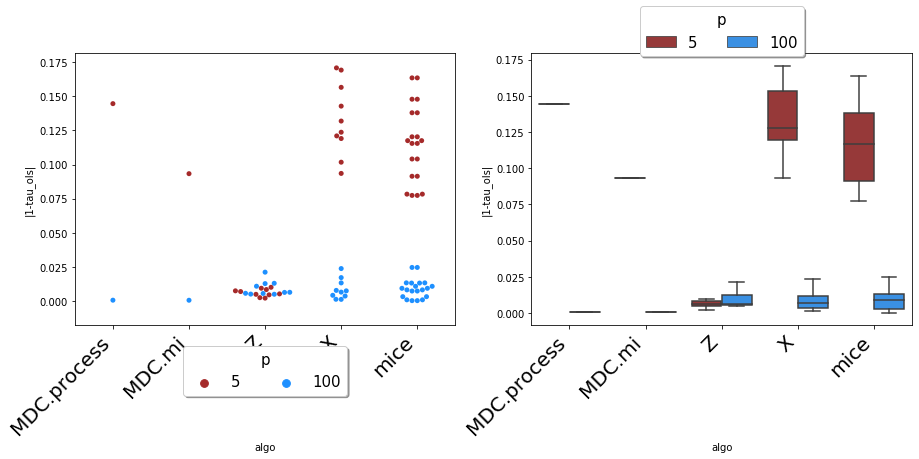

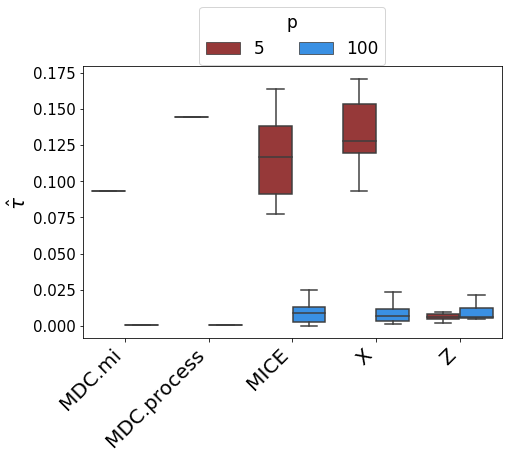

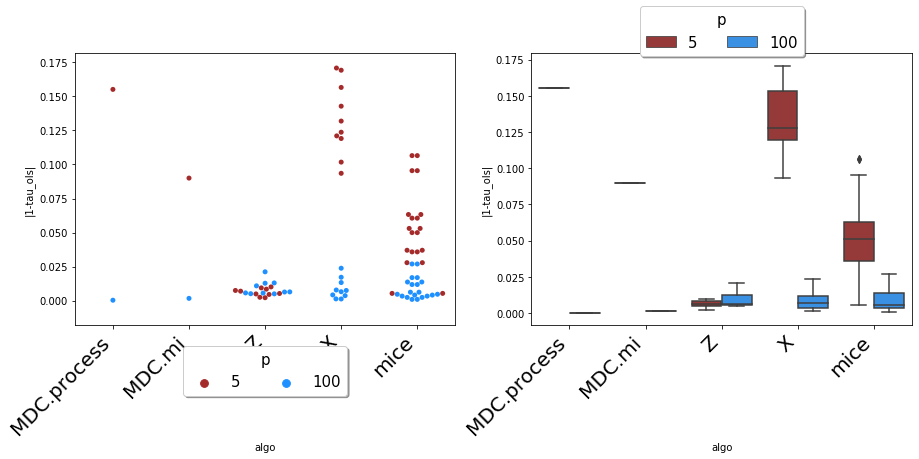

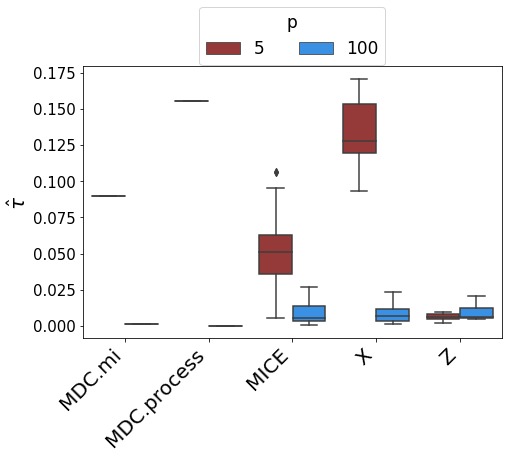

In [15]:
sig_prior = 0.1
n_epochs = 400
n = 1000
add_wy = True
citcio = False
for prop_miss in [0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss,
                              hue = 'p', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss,
                          hue = 'p', palette=['brown','dodgerblue'])

## Medium prior variance

Proportion of missing values: 0.1
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'd': 3, 'add_wy': False, 'method': 'glm', 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'd': 3, 'add_wy': False, 'method': 'glm', 'p': 100, 'n_epochs': 10, 'n': 1000}
p : 5
MDC.process: mean  |1-tau_dr| : 0.08041466856484436 std:  nan
MDC.mi: mean  |1-tau_dr| : 0.04816431549575251 std:  nan
mice: mean  |1-tau_dr| : 0.0649994390913258 std:  0.008531495022845195
mean_imp: mean  |1-tau_dr| : 0.06624560233390105 std:  0.0123596211722515
full: mean  |1-tau_dr| : 0.06363369012817217 std:  0.012007810716193097
p : 100
MDC.process: mean  |1-tau_dr| : 0.014345803631504062 std:  nan
MDC.mi: mean  |1-tau_dr| : 0.0023309372059419076 std:  nan
mice: mean  |1-tau_dr| : 0.08163674405359364 std:  0.006797488349913035
mean_imp: mean  |1-tau_dr| : 0.12347596150688897 std:  0.0335636705955

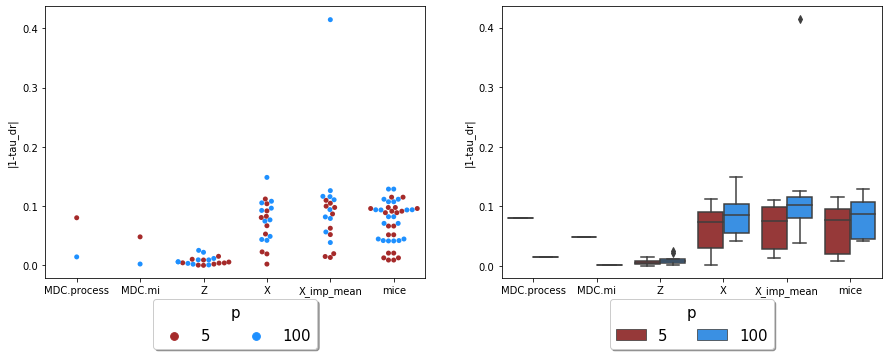

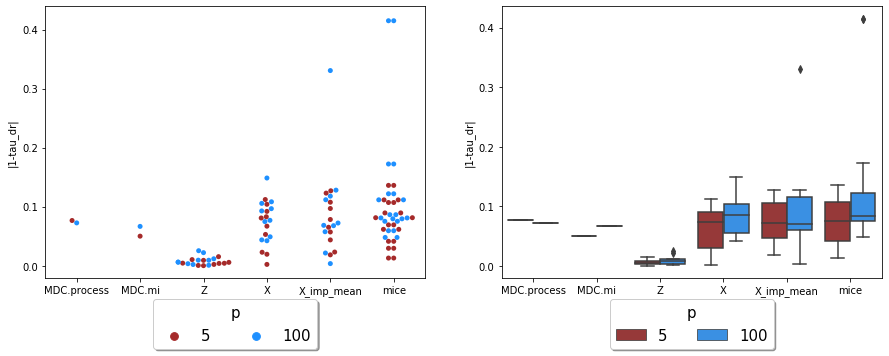

In [959]:
sig_prior = 1
n_epochs = 10
n = 1000
add_wy = False
citcio = False
for prop_miss in [0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss, 
                              hue = 'p', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss, 
                          hue = 'p', palette=['brown','dodgerblue'])


## Large prior variance

Proportion of missing values: 0.1
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
Proportion of missing values: 0.3
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.3, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.3, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}


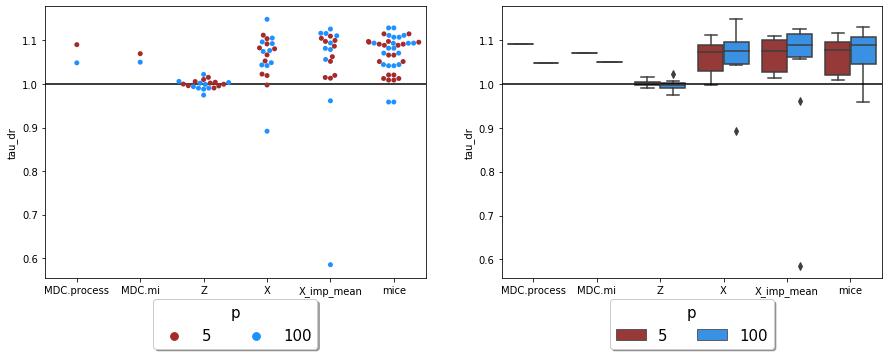

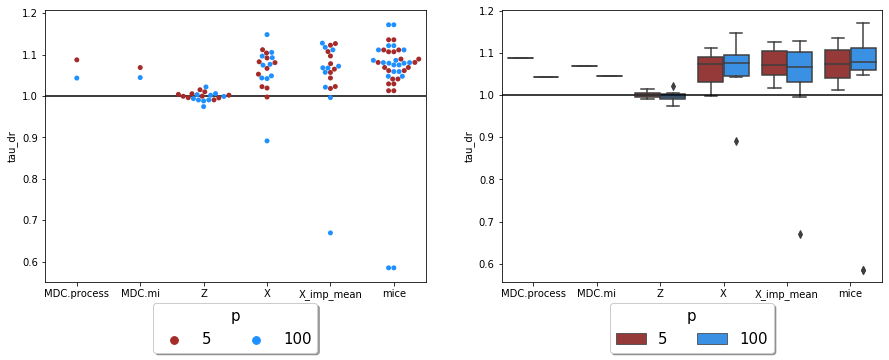

In [879]:
sig_prior = 10
n_epochs = 400
n = 1000
add_wy = False
citcio = False
for prop_miss in [0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                              df_mice_results = df_mice, loss = loss, 
                              hue = 'p', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                          df_mice_results = df_mice, loss = loss, 
                          hue = 'p', palette=['brown','dodgerblue'])


## Number of epochs

Proportion of missing values: 0.1
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
    model     n    p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
181  lrmf  1000  100        0.1     0    glm   False  0.977685  0.999794   
187  lrmf  1000  100        0.1     1    glm   False  0.997127  0.993682   
193  lrmf  1000  100        0.1     2    glm   False  0.985843  1.007623   
199  lrmf  1000  100        0.1     3    glm   False  1.021522  1.022713   
205  lrmf  1000  100        0.1     4    glm   False  0.985727  0.997716   
211  lrmf  1000  100        0.1     5    glm   False  0.982312  1.003073   
217  lrmf  1000  100        0.1     6    glm   False  0.949432  0.998486   
223

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
    model     n    p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
181  lrmf  1000  100        0.1     0    glm   False  0.977685  0.999794   
187  lrmf  1000  100        0.1     1    glm   False  0.997127  0.993682   
193  lrmf  1000  100        0.1     2    glm   False  0.985843  1.007623   
199  lrmf  1000  100        0.1     3    glm   False  1.021522  1.022713   
205  lrmf  1000  100        0.1     4    glm   False  0.985727  0.997716   
211  lrmf  1000  100        0.1     5    glm   False  0.982312  1.003073   
217  lrmf  1000  100        0.1     6    glm   False  0.949432  0.998486   
223

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
    model     n    p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
181  lrmf  1000  100        0.1     0    glm   False  0.977685  0.999794   
187  lrmf  1000  100        0.1     1    glm   False  0.997127  0.993682   
193  lrmf  1000  100        0.1     2    glm   False  0.985843  1.007623   
199  lrmf  1000  100        0.1     3    glm   False  1.021522  1.022713   
205  lrmf  1000  100        0.1     4    glm   False  0.985727  0.997716   
211  lrmf  1000  100        0.1     5    glm   False  0.982312  1.003073   
217  lrmf  1000  100        0.1     6    glm   False  0.949432  0.998486   
2

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


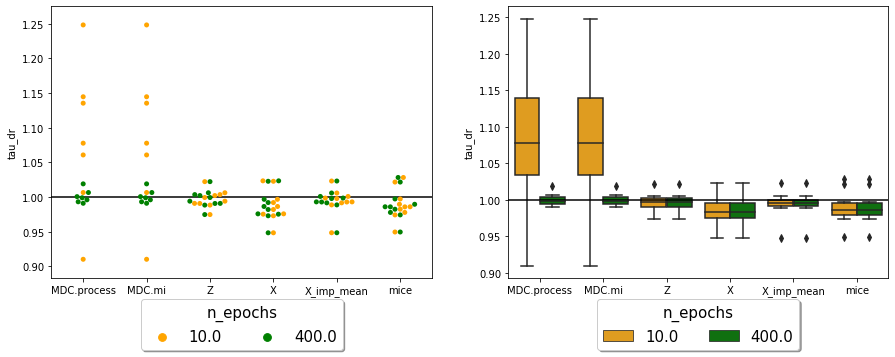

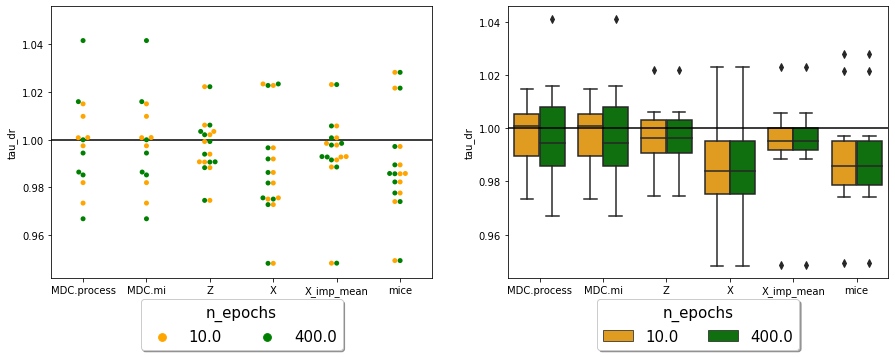

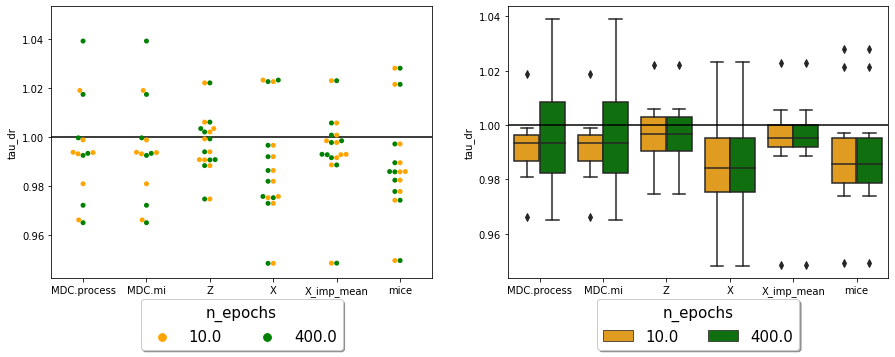

In [817]:
prop_miss = 0.1
p = 100
for sig_prior in [0.1, 1, 10]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else: 
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] ==p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


Proportion of missing values: 0.1
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
    model     n  p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
180  lrmf  1000  5        0.1     0    glm   False  0.886267  0.883639   
186  lrmf  1000  5        0.1     1    glm   False  0.860388  0.870988   
192  lrmf  1000  5        0.1     2    glm   False  0.917789  0.907634   
198  lrmf  1000  5        0.1     3    glm   False  0.820113  0.830055   
204  lrmf  1000  5        0.1     4    glm   False  0.844855  0.842745   
210  lrmf  1000  5        0.1     5    glm   False  0.849483  0.861423   
216  lrmf  1000  5        0.1     6    glm   False  0.865897  0.880311   
222  lrmf  1000  5     

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
    model     n  p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
180  lrmf  1000  5        0.1     0    glm   False  0.886267  0.883639   
186  lrmf  1000  5        0.1     1    glm   False  0.860388  0.870988   
192  lrmf  1000  5        0.1     2    glm   False  0.917789  0.907634   
198  lrmf  1000  5        0.1     3    glm   False  0.820113  0.830055   
204  lrmf  1000  5        0.1     4    glm   False  0.844855  0.842745   
210  lrmf  1000  5        0.1     5    glm   False  0.849483  0.861423   
216  lrmf  1000  5        0.1     6    glm   False  0.865897  0.880311   
222  lrmf  1000  5     

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
    model     n  p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
180  lrmf  1000  5        0.1     0    glm   False  0.886267  0.883639   
186  lrmf  1000  5        0.1     1    glm   False  0.860388  0.870988   
192  lrmf  1000  5        0.1     2    glm   False  0.917789  0.907634   
198  lrmf  1000  5        0.1     3    glm   False  0.820113  0.830055   
204  lrmf  1000  5        0.1     4    glm   False  0.844855  0.842745   
210  lrmf  1000  5        0.1     5    glm   False  0.849483  0.861423   
216  lrmf  1000  5        0.1     6    glm   False  0.865897  0.880311   
222  lrmf  1000  5   

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


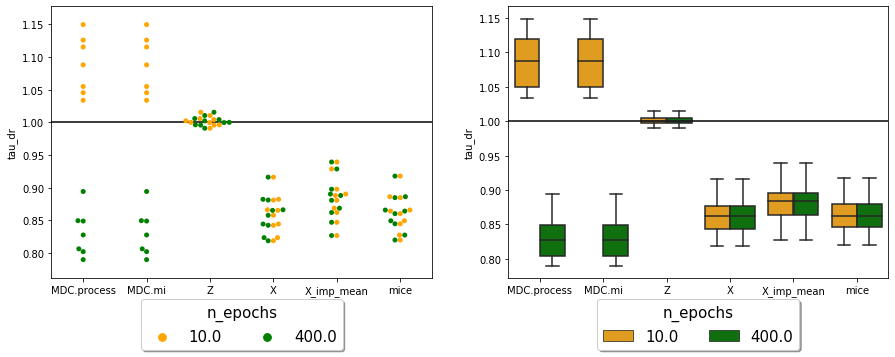

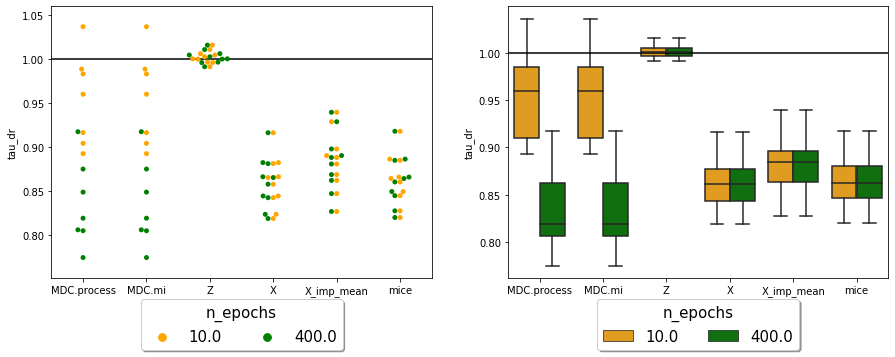

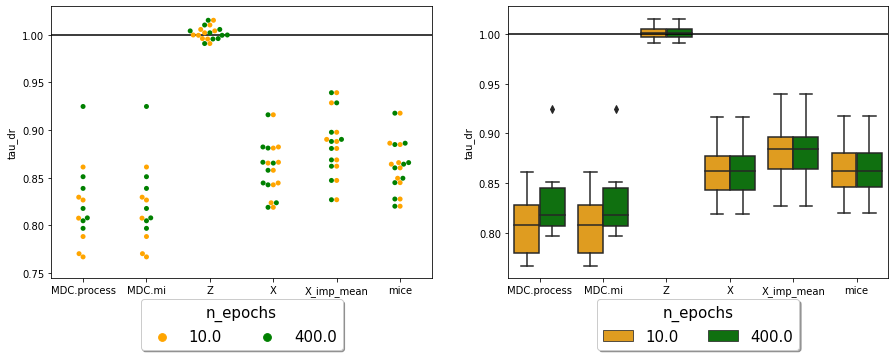

In [816]:
prop_miss = 0.1
p = 5
for sig_prior in [0.1, 1, 10]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else: 
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] ==p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])

In [ ]:
correlation_tau(df)

In [ ]:
#sns.pairplot(df[l_tau])

## DCOV

In [945]:
df = load_results('exp_29.1_10_small.csv_temp')
#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


columns = df.columns.tolist()
columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))
df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df.head()

results.shape (76, 24)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,True,1.081424,1.081779,1.081908,0.499922,0.119565,0.081424,0.081779,0.081908,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,True,1.001166,1.001854,0.999689,0.706796,0.663552,0.001166,0.001854,0.000311,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,True,1.103148,1.103060,1.109032,0.412992,0.105296,0.103148,0.103060,0.109032,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,True,0.994866,0.993980,0.995914,0.690837,0.595437,0.005134,0.006020,0.004086,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,True,1.077038,1.076966,1.074978,0.525174,0.127417,0.077038,0.076966,0.074978,MDC.process


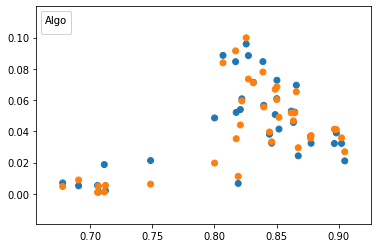

In [949]:
loss = '|1-tau_dr|'
df_ = df.copy()
df_ = df_.loc[(df_['p'] == 100)]
df_ = df_.loc[df_['model']=="dlvm"]
#df_ = df_.loc[df_['add_wy'] == False]
df_ = df_.loc[df_['citcio'] == False] 
#df_ = df_.loc[df_['n_epochs'] == 400] 
#df_ = df_.loc[df_['sig_prior']== 0.1]
#df_ = df_.loc[df_['prop_miss'] == 0.1]


#sns.swarmplot(x='dcor_zhat', y=loss, hue = 'algo', data=df_)

colors = {'MDC.process':'tab:blue', 'MDC.mi':'tab:orange'}

fig, ax = plt.subplots()
scatter = ax.scatter(df_['dcor_zhat'], y=df_[loss], c=df_['algo'].apply(lambda x: colors[x]))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Algo")
ax.add_artist(legend1)

plt.show()


# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# corr = df_[list(['dcor_zhat', '|1-tau_dr|', '|1-tau_ols|'])].corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr, mask=mask, center=0, #, cmap=cmap
#                 square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Correlation between dcor(Zhat) and bias')